In [ ]:
## Daily exercise, part 1

In this exercise you are asked to work with two different datasets:
- `closing_prices.csv` contains the daily closing price in 2020 for ten different stocks.
- `EXR.xlsx` contains that daily exchange rate from USD to NOK in 2020 retrieved from Norges Bank.

You are asked to:

1. Import (and clean) the files
2. Merge the files and convert the closing price from USD to NOK
3. Create and save a graph that shows the daily closing price in NOK for Apple

Enter the path to the closing prices CSV file: /content/closing_prices.csv
Enter the path to the exchange rates Excel file: /content/EXR.xlsx


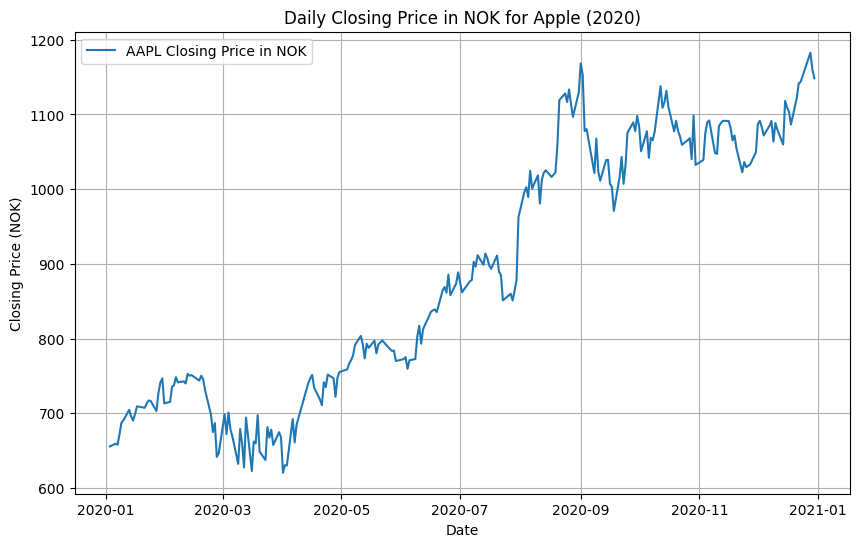

Graph saved as 'Apple_Closing_Price_NOK_2020.png' in the current directory.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Ask the user for file paths
closing_prices_path = input("Enter the path to the closing prices CSV file: ")
exchange_rates_path = input("Enter the path to the exchange rates Excel file: ")

# Load and clean the closing prices data
closing_prices = pd.read_csv(closing_prices_path)
closing_prices['Close'] = closing_prices['Close'].astype(float)  # Convert closing prices to floats

# Load and clean the exchange rates data
exchange_data = pd.read_excel(exchange_rates_path, sheet_name='Dataset')
dates = exchange_data.iloc[18, 1:].dropna()  # Extract dates
rates = exchange_data.iloc[19, 1:].dropna().astype(float)  # Extract rates and convert to floats
exchange_rates = pd.DataFrame({'Date': dates, 'Exchange Rate': rates})
exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date'])  # Ensure dates are in datetime format

# Merge the datasets on the date column and convert closing prices to NOK
closing_prices['Date'] = pd.to_datetime(closing_prices['Date'])  # Ensure dates are in datetime format
merged_data = pd.merge(closing_prices, exchange_rates, on='Date')
merged_data['Close_NOK'] = merged_data['Close'] * merged_data['Exchange Rate']  # Convert to NOK

# Filter the data to include only Apple (AAPL)
apple_data = merged_data[merged_data['Stock'] == 'AAPL']

# Create a plot of the daily closing price in NOK for Apple
plt.figure(figsize=(10, 6))
plt.plot(apple_data['Date'], apple_data['Close_NOK'], label='AAPL Closing Price in NOK')
plt.title('Daily Closing Price in NOK for Apple (2020)')
plt.xlabel('Date')
plt.ylabel('Closing Price (NOK)')
plt.legend()
plt.grid(True)
plt.savefig('Apple_Closing_Price_NOK_2020.png')  # Save the plot as a PNG file
plt.show()

print("Graph saved as 'Apple_Closing_Price_NOK_2020.png' in the current directory.")


In [ ]:
## Daily exercise, part 2

**Task 1** In data anlysis, we often need to convert files from one file format to another. In this task, you should use a `for` loop to import each of the csv files in the `stocks` folder, and store the file as an excel spreadsheet in a folder named `stocks_excel`.

**Task 2** You are now asked to create a series of plots of the daily closing price using the file `closing_prices.csv`. The goal is to use `for` loops to generate the plots in all tasks to minimize code duplication. Import the file with the closing prices, and create the following plots:

**a)** Create a single graph that plots the daily closing prices of all of the stocks except Google (GOOG) and Amazon (AMZN). Remember to add a legend to identify the different stocks.

**b)** Create a figure with four subplots side-by-side (i.e., 1 x 4 subplot) with each subplot showing the closing price of a stock of your choice.

**c)** Plot the closing price of the same four stocks as above, but now the figure is a 2 x 2 subplot, i.e. two rows and two columns.

Note that you should first search online for help with how to generate the plots, e.g., google "matplotlib 2x2 subplots". After you have looked online, then you can ask chatGPT for assistence or suggestions on how to improve your code.

Enter the path to the stocks folder: /content/stocks
All CSV files have been converted to Excel and saved in 'stocks_excel' folder.
Enter the path to the closing prices CSV file: /content/closing_prices.csv


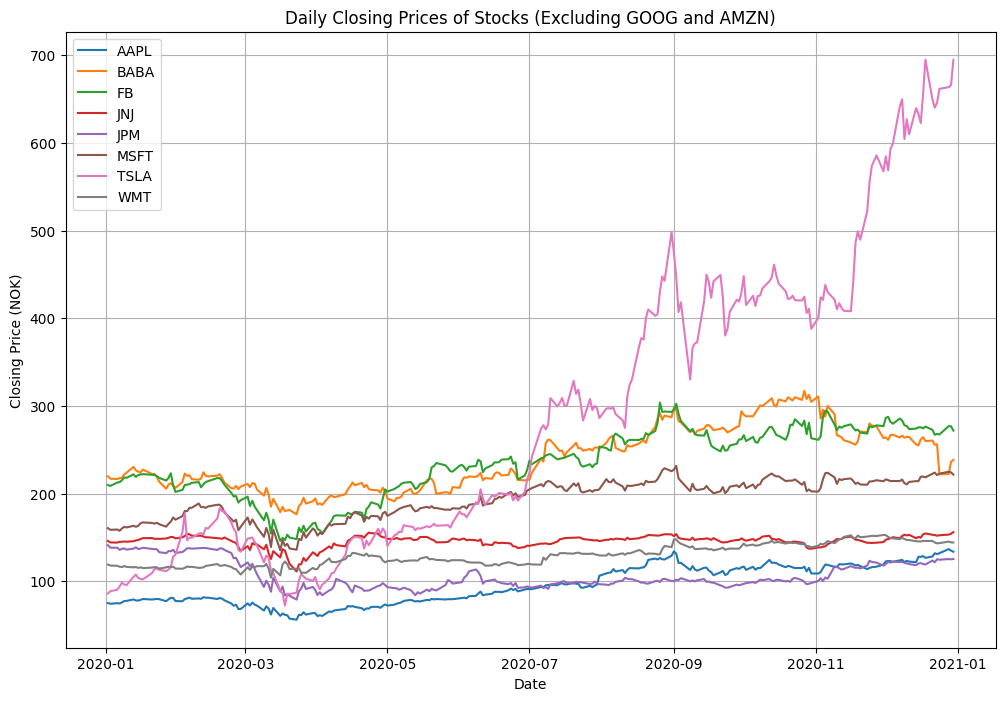

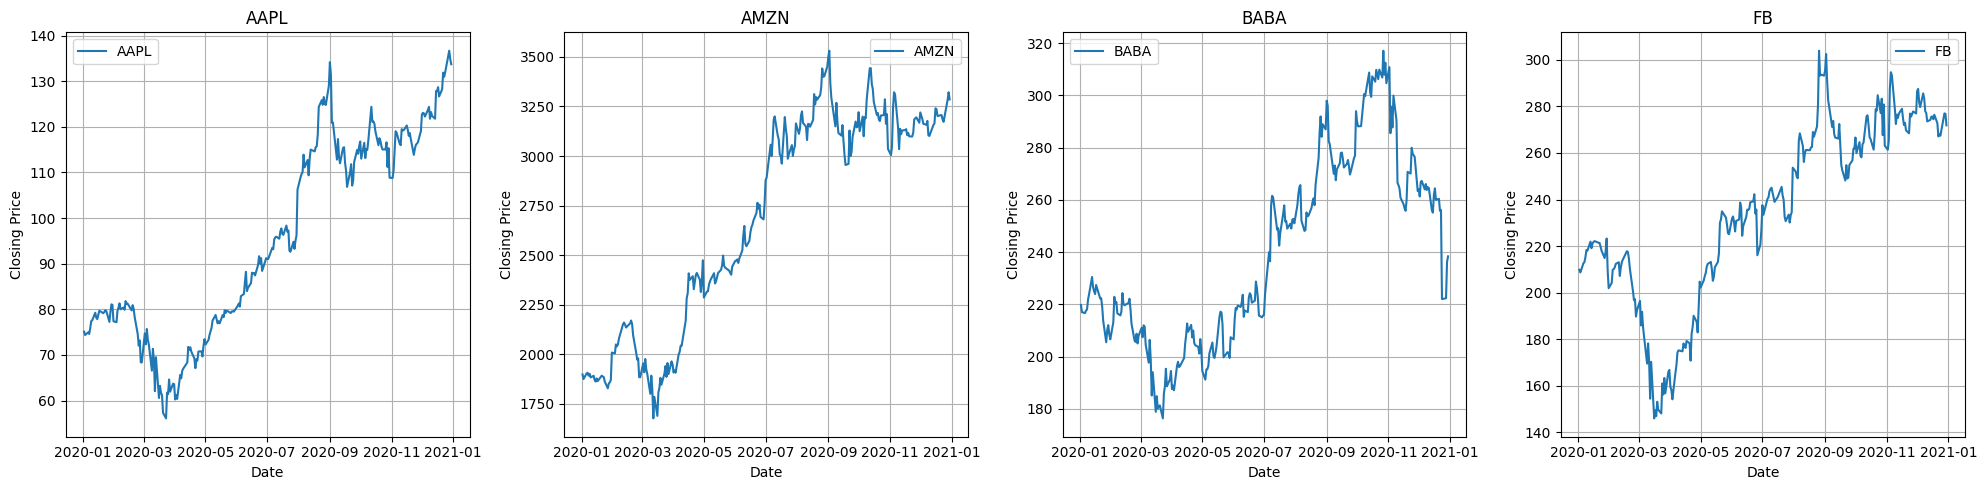

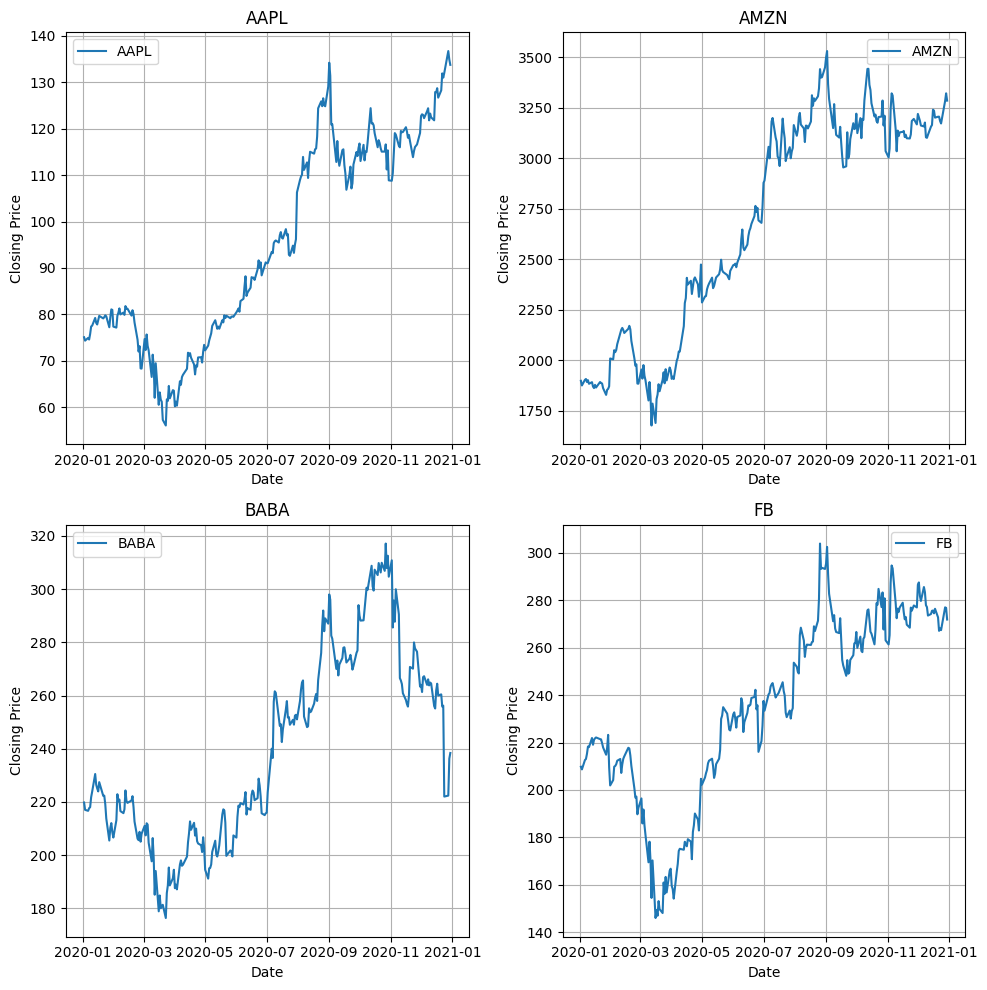

All plots have been saved as PNG files in the current directory.


In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Task 1: Convert CSV files to Excel
stocks_folder = input("Enter the path to the stocks folder: ")
stocks_excel_folder = "stocks_excel"

# Create the output folder if it doesn't exist
if not os.path.exists(stocks_excel_folder):
    os.makedirs(stocks_excel_folder)

# Convert each CSV file to Excel
for file_name in os.listdir(stocks_folder):
    if file_name.endswith('.csv'):
        csv_path = os.path.join(stocks_folder, file_name)
        excel_path = os.path.join(stocks_excel_folder, file_name.replace('.csv', '.xlsx'))
        df = pd.read_csv(csv_path)
        df.to_excel(excel_path, index=False)

print(f"All CSV files have been converted to Excel and saved in '{stocks_excel_folder}' folder.")

# Task 2: Generate plots for closing prices
closing_prices_path = input("Enter the path to the closing prices CSV file: ")
closing_prices = pd.read_csv(closing_prices_path)
closing_prices['Date'] = pd.to_datetime(closing_prices['Date'])

# Task 2a: Plot daily closing prices of all stocks except GOOG and AMZN
excluded_stocks = ['GOOG', 'AMZN']
plt.figure(figsize=(12, 8))
for stock in closing_prices['Stock'].unique():
    if stock not in excluded_stocks:
        stock_data = closing_prices[closing_prices['Stock'] == stock]
        plt.plot(stock_data['Date'], stock_data['Close'], label=stock)

plt.title('Daily Closing Prices of Stocks (Excluding GOOG and AMZN)')
plt.xlabel('Date')
plt.ylabel('Closing Price (NOK)')
plt.legend()
plt.grid(True)
plt.savefig('all_stocks_closing_prices.png')
plt.show()

# Task 2b: Create a 1x4 subplot with daily closing prices of four selected stocks
selected_stocks = closing_prices['Stock'].unique()[:4]
plt.figure(figsize=(20, 5))
for i, stock in enumerate(selected_stocks):
    plt.subplot(1, 4, i + 1)
    stock_data = closing_prices[closing_prices['Stock'] == stock]
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock)
    plt.title(stock)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.savefig('1x4_subplots_closing_prices.png')
plt.show()

# Task 2c: Create a 2x2 subplot with daily closing prices of the same four stocks
plt.figure(figsize=(10, 10))
for i, stock in enumerate(selected_stocks):
    plt.subplot(2, 2, i + 1)
    stock_data = closing_prices[closing_prices['Stock'] == stock]
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock)
    plt.title(stock)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.savefig('2x2_subplots_closing_prices.png')
plt.show()

print("All plots have been saved as PNG files in the current directory.")
